In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
#dataBasePath = 'Resources/hawaii.sqlite'
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
engine.execute('Select max(date) From Measurement').fetchall()

[('2017-08-23',)]

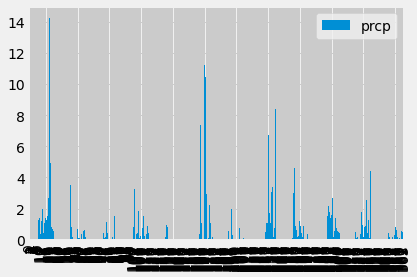

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precipitation_data = pd.read_sql("SELECT * FROM Measurement ORDER by date DESC", conn)
precipitation_data.head()
# Calculate the date one year from the last date in data set.
precipitation_data_yr = pd.read_sql("SELECT * FROM Measurement Where date > '2016-08-24' ORDER by date ASC", conn)
precipitation_data_yr

# Perform a query to retrieve the data(*typo?) and precipitation scores
precipitation = pd.read_sql("SELECT date, prcp  FROM Measurement Where date > '2016-08-24' ORDER by date ASC", conn)
precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
#df = [{'date', 'prcp'}]
p_df = pd.DataFrame(precipitation)
p_df2 = p_df.groupby(['date']).sum()
p_df2.reset_index(inplace = True)
p_df2

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
p_df_chart = p_df2.plot(kind = 'bar')
plt.show()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()